In [1]:
import huggingface_hub
import os

from bitmind.synthetic_image_generation.synthetic_image_generator import SyntheticImageGenerator
from bitmind.image_dataset import ImageDataset
from bitmind.utils.data import sample_dataset_index_name
from bitmind.constants import DATASET_META, HUGGINGFACE_CACHE_DIR
import time

2024-08-24 08:46:08.076386: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-24 08:46:08.095526: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-24 08:46:08.101362: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-24 08:46:08.116271: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-24 08:46:09.214336: W tensorflow/compiler/tf2

In [2]:
print("Loading real datasets")
real_image_datasets = [
    ImageDataset(ds['path'], 'train', ds.get('name', None), ds['create_splits'], 'REUSE_CACHE_IF_EXISTS')
    for ds in DATASET_META['real'][:1]
]


Loading real datasets
Downloaded bitmind/open-images-v7 dataset to /workspace/.cache/huggingface


In [3]:
start_time = time.time()
synthetic_image_generator = SyntheticImageGenerator(
    prompt_type='annotation', 
    use_random_diffuser=False, 
    diffuser_name='black-forest-labs/FLUX.1-dev')

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Initialization of SyntheticImageGenerator took {elapsed_time:.2f} seconds.")

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.


Initialization of SyntheticImageGenerator took 16.38 seconds.


Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
Keyword arguments {'add_watermarker': False} are not expected by FluxPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


A steaming bowl of soup with vegetables and noodles, seen in a close-up shot against a background wall in a restaurant setting.


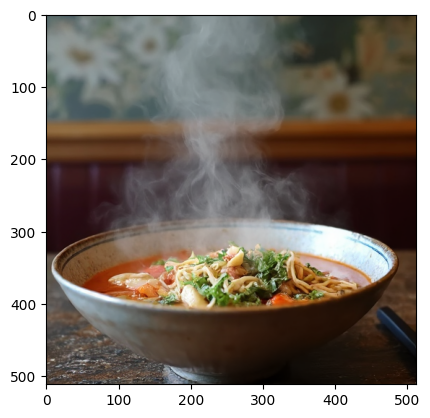

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
Keyword arguments {'add_watermarker': False} are not expected by FluxPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

A woman sits cross-legged on a wooden beam, surrounded by a park setting with a clear blue sky in the background, captured in a portrait view.


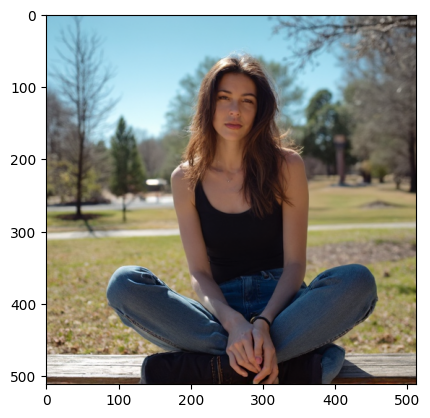

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
Keyword arguments {'add_watermarker': False} are not expected by FluxPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

A blue and white swirled necklace is displayed on a mannequin in a blue background.


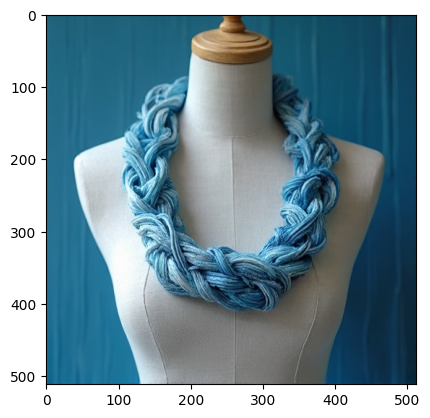

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
Keyword arguments {'add_watermarker': False} are not expected by FluxPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

A woman with a tattoo on her arm is depicted against a metal wall in a portrait.


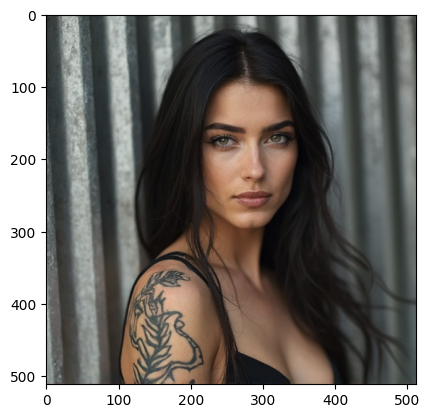

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
Keyword arguments {'add_watermarker': False} are not expected by FluxPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
import matplotlib.pyplot as plt

times = []

for _ in range(5):
    real_dataset_index, source_dataset = sample_dataset_index_name(real_image_datasets)
    real_dataset = real_image_datasets[real_dataset_index]
    images_to_caption, image_indexes = real_dataset.sample(k=1)  # [{'image': PIL Image ,'id': int}, ...]
    
    # generate captions for the real images, then synthetic images from these captions
    sample = synthetic_image_generator.generate(
        k=1, real_images=images_to_caption)[0]  # {'prompt': str, 'image': PIL Image ,'id': int}

    print(sample['prompt'])
    plt.imshow(sample['image'])
    plt.show()

    times.append(sample['gen_time'])

In [ ]:
import numpy as np
np.mean(times), np.std(times)

In [ ]:
sample['image'].size

In [ ]:
from bitmind.constants import VALIDATOR_MODEL_META

VALIDATOR_MODEL_META


In [ ]:
sample

In [ ]:
sample

In [ ]:
import transformers
print(transformers.__version__)